In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
from utils.partonicXS import *
from utils.protonXS import *
import utils.tt_prod_ML4EFT
import utils.validation
from utils.funcs import parton_data_preprocessing, dataset_loader, MLP, train_test_model

LHAPDF 6.5.4 loading /Users/letizia/miniconda3/envs/findNP/share/LHAPDF/NNPDF23_lo_as_0130_qed/NNPDF23_lo_as_0130_qed_0000.dat
NNPDF23_lo_as_0130_qed PDF set, member #0, version 1; LHAPDF ID = 247000
LHAPDF 6.5.4 loading /Users/letizia/miniconda3/envs/findNP/share/LHAPDF/NNPDF23_lo_as_0130_qed/NNPDF23_lo_as_0130_qed_0000.dat
NNPDF23_lo_as_0130_qed PDF set, member #0, version 1; LHAPDF ID = 247000
All tests passed!


In [2]:
np.random.seed(0)

In [3]:
palette = sns.color_palette('Set2')
sns.set_palette(palette)
plt.rcParams['text.usetex'] = False
p = {'size': 18, 'family': 'cmr10'}

In [2]:
path_to_MC = '../../MonteCarlo'
X, Xsm, Xc8qt2, y = parton_data_preprocessing('c8qt2', path_to_MC)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_size = 0.2
random_state = 42
batch_size = 200000
train_loader, test_loader = dataset_loader(X, y, test_size, random_state, batch_size, device)

In [6]:
model = MLP().to(device)

print(f"Model structure: {model}")

Model structure: MLP(
  (layer1): Linear(in_features=2, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=70, bias=True)
  (layer3): Linear(in_features=70, out_features=150, bias=True)
  (layer4): Linear(in_features=150, out_features=100, bias=True)
  (layer5): Linear(in_features=100, out_features=50, bias=True)
  (layer6): Linear(in_features=50, out_features=1, bias=True)
)


In [7]:
criterion = nn.BCELoss()
learning_rate = 0.0005
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

In [8]:
train_loss, test_loss = train_test_model(model, criterion, optimizer, train_loader, test_loader, epochs=200)

Epoch 0
Train Loss 0.6924334168434143
Test Loss 0.6908671855926514
-----------------------------------
Epoch 10
Train Loss 0.653188169002533
Test Loss 0.6476492881774902
-----------------------------------
Epoch 20
Train Loss 0.5718468725681305
Test Loss 0.5714966058731079
-----------------------------------
Epoch 30
Train Loss 0.5597810447216034
Test Loss 0.5591899156570435
-----------------------------------
Epoch 40
Train Loss 0.5581798851490021
Test Loss 0.5580267310142517
-----------------------------------
Epoch 50
Train Loss 0.557646781206131
Test Loss 0.5574154257774353
-----------------------------------
Epoch 60
Train Loss 0.5568061470985413
Test Loss 0.5569753646850586
-----------------------------------
Epoch 70
Train Loss 0.5569662749767303
Test Loss 0.5567113161087036
-----------------------------------
Epoch 80
Train Loss 0.5566980242729187
Test Loss 0.5564697980880737
-----------------------------------
Epoch 90
Train Loss 0.556753009557724
Test Loss 0.5563061237335205


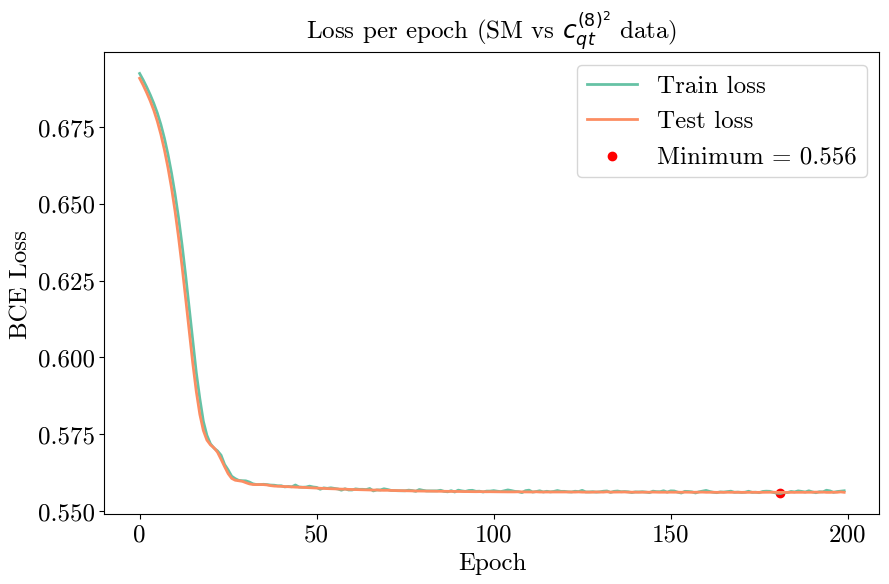

In [9]:
min_loss = min(train_loss)
min_loss_index = train_loss.index(min_loss)

plt.figure(figsize=(10, 6))
plt.plot(train_loss, linewidth=2, label = 'Train loss')
plt.plot(test_loss, linewidth=2 , label = 'Test loss')
plt.scatter(min_loss_index, min_loss, color='red', label=f'Minimum = {min_loss:.3f}')
plt.xlabel('Epoch', fontdict=p)
plt.ylabel('BCE Loss', fontdict=p)
plt.legend(prop = p, loc='upper right')
plt.title('Loss per epoch (SM vs $c^{(8)^2}_{qt}$ data)', fontdict=p)
plt.xticks(**p)
plt.yticks(**p)
plt.savefig('../plots/Loss_c8qt2.pdf')
plt.show()